![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRjFm003pSAOtHmnUm7e--Xquwo90Hp5-U_3wSZrkChGz4tQYWZ)
# Introduction to Machine Learning
## Innopolis University 
### Week 9: Clustering
1. Unsupervised Learning
  * Un/Supervised Comparison
  * Applications
  * Examples of Techniques
  * Evaluation UL
2. Clustering
  * K-means
  * Implementaion
  * K-meams++
  * how to choose K
  * final thoughts



# 1. Unsupervised Learning
Learning from raw data.

## Diferences between Unsupervised and supervised Learning
![alt text](https://miro.medium.com/max/1600/0*F23wacf0xFsV4I40.jpg)

## Applications
![alt text](https://miro.medium.com/max/2632/1*HaExieykcOT5oI2_xKisrQ.png)

[This person doesn't exist](https://thispersondoesnotexist.com/)

![alt text](https://thispersondoesnotexist.com/image)

[This cat doesn't exist](https://thesecatsdonotexist.com/)

![alt text](https://d2ph5fj80uercy.cloudfront.net/02/cat5438.jpg)

Word embeddings
![alt text](https://miro.medium.com/max/3200/0*quUwP6EqEhFmNAqX)

Image Segmentation and object Tracking

![alt text](https://www.researchgate.net/profile/Hedayat_Abrishami/publication/305222104/figure/fig14/AS:383122748264453@1468354989616/Example-of-Applying-the-Mean-shift-Segmentation-Notes-Left-side-Original-Images-right.png)

# Evaluation 
How can you evaluate a result if there is no right answer.

# Clustering
## K-means
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

A cluster refers to a collection of data points aggregated together because of certain similarities.

To process the learning data, the K-means algorithm in data mining starts with a **first group of randomly selected centroids**, which are used as the beginning points for every cluster, and then **performs iterative** (repetitive) calculations to **optimize the positions of the centroids**

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/8dc15ec63e0676fc07e790f61efd89484a6b7922)

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/440px-K-means_convergence.gif)

![alt text](https://ds055uzetaobb.cloudfront.net/brioche/uploads/y4KGN92h7r-screen-shot-2016-05-05-at-43007-pm.png?width=1200)

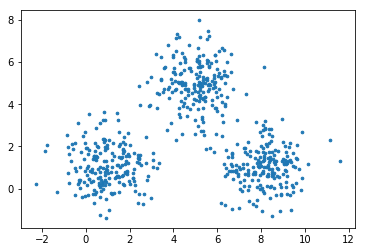

In [0]:
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools


center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3
y_0 = np.zeros(200)
y_1 = np.zeros(200) + 1
y_2 = np.zeros(200) + 2

data = np.concatenate((data_1, data_2, data_3), axis = 0)
y = np.array(np.concatenate((y_0, y_1, y_2), axis = 0),dtype=int)
X = data 

plt.scatter(data[:,0], data[:,1], s=7)

In [0]:
from sklearn.base import BaseEstimator, ClassifierMixin

class InnoKmeans(BaseEstimator, ClassifierMixin):  
    
    def __init__(self, k=3,centers = None):
        self.k = k
        self.centers = centers

    def fit(self, X, y=None):
       
        k = self.k
        n = X.shape[0]
        c = X.shape[1]
        if self.centers is None:
            mean = np.mean(X, axis = 0)
            std = np.std(X, axis = 0)
            self.centers = np.random.randn(self.k,c)*std + mean
        centers = self.centers
        centers_old = np.zeros(self.centers.shape) # to store old centers
        centers_new = deepcopy(self.centers) # Store new centers

        clusters = np.zeros(n)
        distances = np.zeros((n,k))

        error = np.linalg.norm(centers_new - centers_old)

        # When, after an update, the estimate of that center stays the same, exit loop
        while error != 0:
            # Measure the distance to every center
            for i in range(k):
                distances[:,i] = np.linalg.norm(X - centers[i], axis=1)
            # Assign all training data to closest center
            clusters = np.argmin(distances, axis = 1)

            centers_old = deepcopy(centers_new)
            # Calculate mean for every cluster and update the center
            for i in range(k):
                centers_new[i] = np.mean(X[clusters == i], axis=0)
            error = np.linalg.norm(centers_new - centers_old)
            centers = centers_new    
        self.centers = centers_new    
        return self


    def predict(self, X, y=None):
        k = self.k
        n = X.shape[0]
        c = X.shape[1]
        distances = np.zeros((n,k))
        for i in range(k):
            distances[:,i] = np.linalg.norm(X - self.centers[i], axis=1)
        return np.argmin(distances,axis=1)

    def score(self, X, y=None):
        return 0

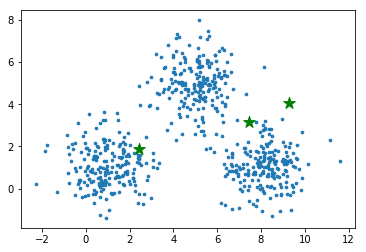

In [0]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

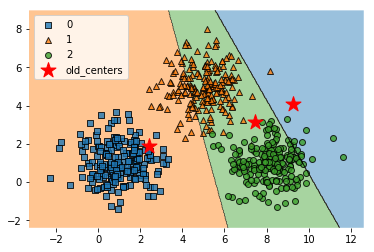

In [0]:
clf = InnoKmeans(3,centers)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='R', s=250,label='old_centers')
plt.legend()

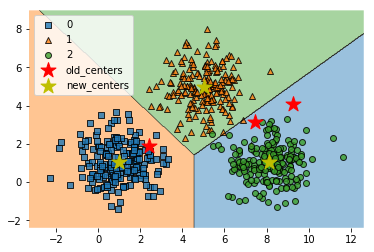

In [0]:
clf = InnoKmeans(3,centers).fit(X,y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='R', s=250,label='old_centers')
plt.scatter(clf.centers[:,0], clf.centers[:,1], marker='*', c='y', s=250,label='new_centers')
plt.legend()

Play with the number of clusters.

Estimate the complexity of K-MEANS:


* n is the number of d-dimensional vectors (to be clustered)
* k the number of clusters
* i the number of iterations needed until convergence.
* d number of features



The answer is:

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/7a1d9d1a265e27b3a21e050f1730aea5eb28e577)

Any other problems? The approximation found can be arbitrarily bad with respect to the objective function compared to the optimal clustering.
![alt text](https://drive.google.com/uc?id=1pXZshP4_r93jkhE7DB-V_mLh2HEKFkA1)

# K-means++

1. Choose one center uniformly at random from among the data points.
2. For each data point x, compute D(x).
3. Choose the **next centroid** using a weighted **probability** distribution where a point x is chosen with probability **proportional** to $D(x)^2$.
4. Repeat.

D(x): the distance betweem x and the closest center


In [0]:
from numpy.random import choice


def choose(n,p):
    index = choice(n,1,replace=False,p=p)
    return index
def kmeans_plus_plus(X,k):
    n = X.shape[0]
    c = X.shape[1]
    weights = np.ones(n)/n
    centers = np.zeros((k,c))+np.inf
    distances = np.zeros((n,k))
    
    centers[0] = X[choose(n,weights)]
    for j in range(1,k):
        for i in range(k):
            distances[:,i] = np.linalg.norm(X - centers[i], axis=1)
        weights = distances.min(axis=1)**2
        weights /= weights.sum()
        centers[j] = X[choose(n,weights)]
    return centers
centers = kmeans_plus_plus(X,3)

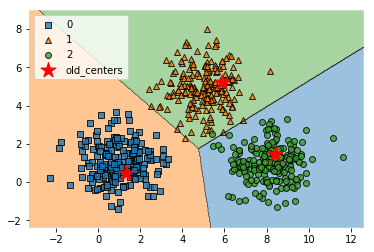

In [0]:
clf = InnoKmeans(3,centers)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='R', s=250,label='old_centers')
plt.legend()

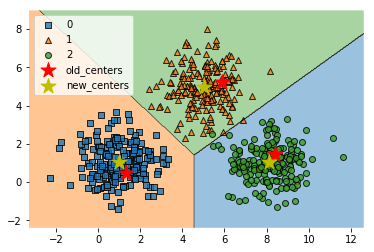

In [0]:
clf = InnoKmeans(3,centers).fit(X,y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='R', s=250,label='old_centers')
plt.scatter(clf.centers[:,0], clf.centers[:,1], marker='*', c='y', s=250,label='new_centers')
plt.legend()

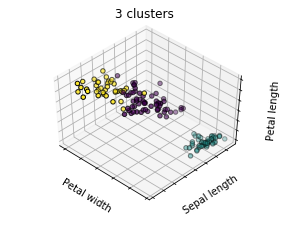

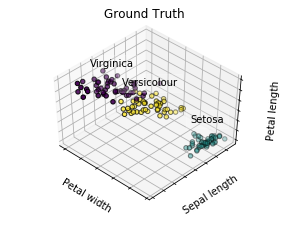

In [0]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_3', KMeans(n_clusters=3))]

fignum = 1
titles = [ '3 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

# How to choose k

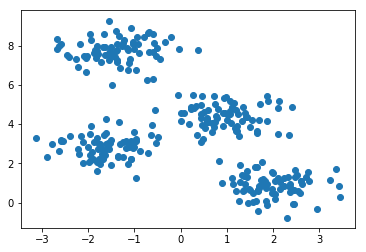

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])


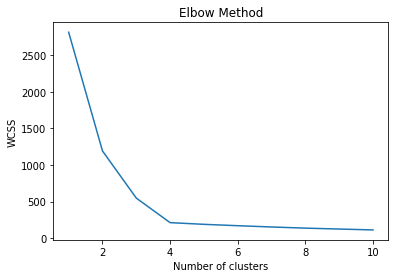

In [0]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

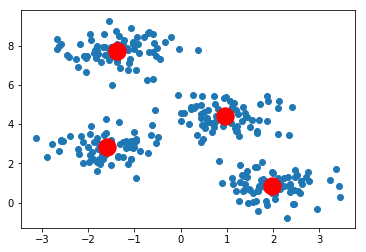

In [0]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# Problems with K-means:
* Convergence.
* Eucledian distance (we will see the effect in the next picture).
* must specify k.

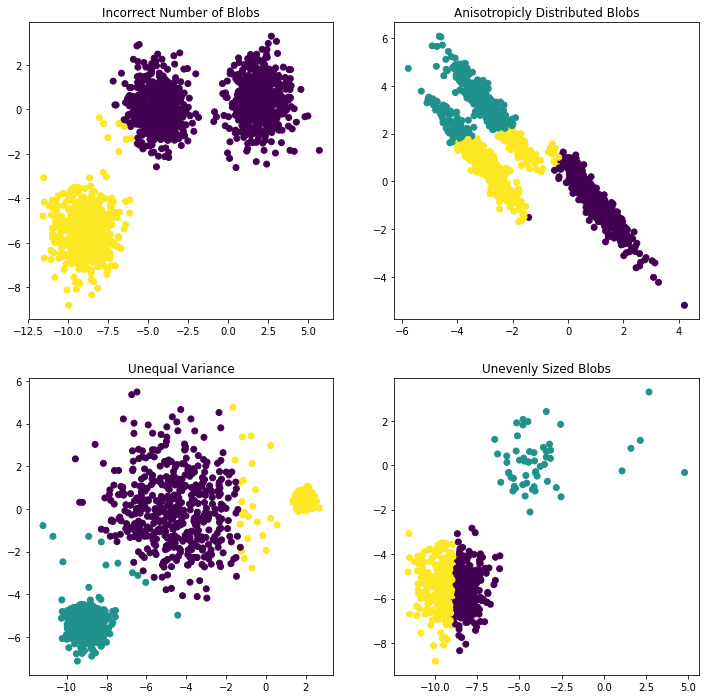

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[0.5, 1.9, 0.2],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:50000], X[y == 1][:50], X[y == 2][:5]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

**K-means problems:**
* Incorrect Number of clusters(k)
* non-cyclic clusters (not blobs)
* unequal variance of blobs
* unequal size of samples per cluster



# Final Thoughts:
* K-means provides clusters by finding their centers.
* K-means has a linear decicion boundry.
* K-means need to know the number of clusters.
* Use the elbow method to find it.
* K-means++ is an initialization technique.
* Evaluation???? 
